In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits

from cycspec_simulator import (
    TemplateProfile,
    BasebandModel,
    FreqOnlyPredictor,
    cycfold4,
)

%matplotlib notebook

In [3]:
template_file = "B1937+21.Rcvr1_2.GUPPI.15y.x.sum.sm"
template = TemplateProfile.from_file(template_file)
template.normalize()
template.make_posdef()

Adjusting I**2 by 5.5361972783884994e-08


<IPython.core.display.Javascript object>


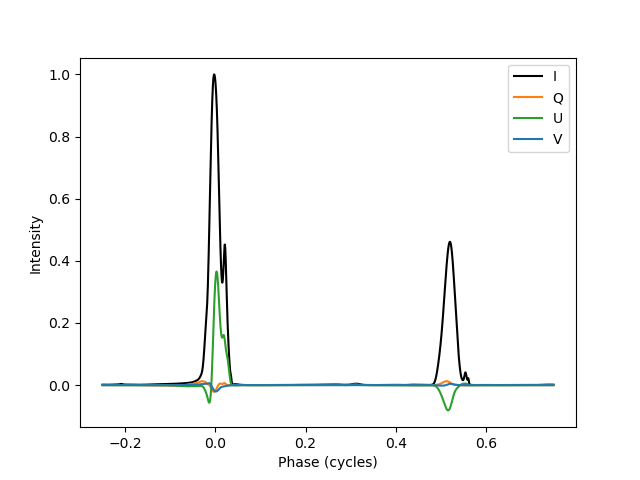

In [4]:
template.plot(what='IQUV', shift=0.25)
plt.show()

In [11]:
pulse_freq = 641.948222127829 # Hz
bandwidth = 1.5625e6 # Hz

In [12]:
model = BasebandModel(template, bandwidth=bandwidth, pulse_freq=pulse_freq)
data = model.sample(2**20)

In [13]:
predictor = FreqOnlyPredictor(pulse_freq)
pspec_xx, pspec_yy = periodic_spectrum_cycfold4(data, 128, 256, predictor)

<IPython.core.display.Javascript object>


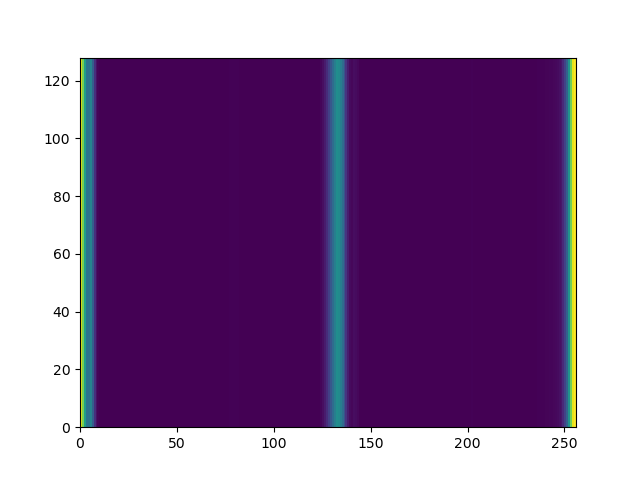

In [14]:
plt.pcolormesh(pspec_xx)

<IPython.core.display.Javascript object>


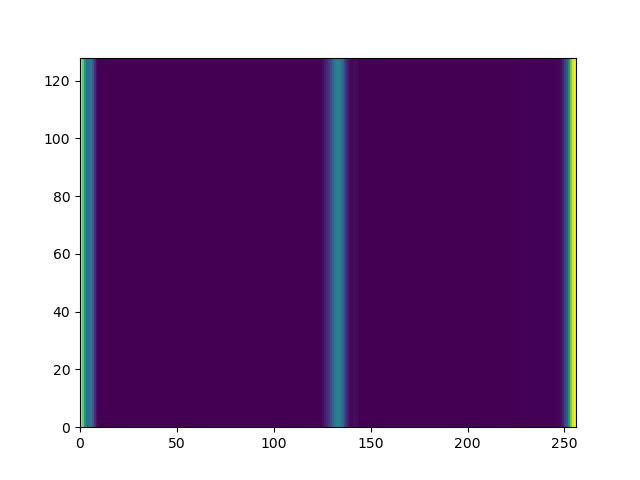

In [15]:
plt.pcolormesh(pspec_yy)

<IPython.core.display.Javascript object>


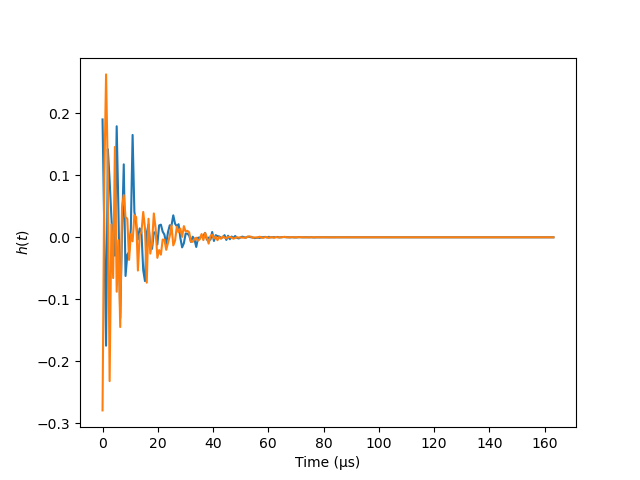

In [18]:
tsc = 5e-6 # s
dt = 1/model.bandwidth
h = np.sqrt(np.exp(-data.t[:256]/tsc)*dt/tsc)*(np.random.randn(256) + 1j*np.random.randn(256))/2
plt.plot(data.t[:256]/1e-6, h.real)
plt.plot(data.t[:256]/1e-6, h.imag)
plt.xlabel("Time (μs)")
plt.ylabel("$h(t)$")
plt.show()

<IPython.core.display.Javascript object>


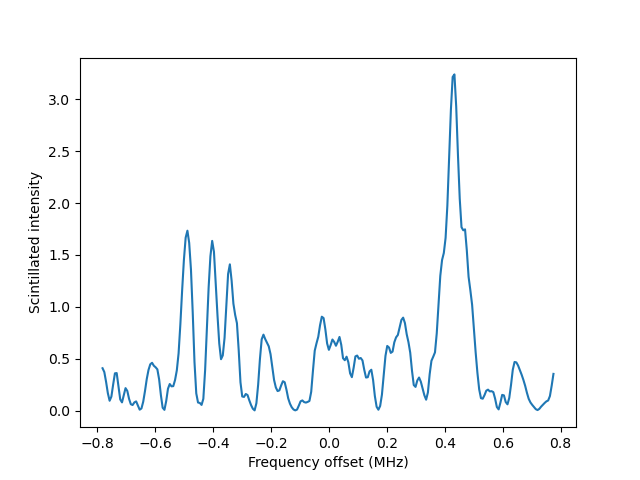

In [19]:
H = np.fft.fft(h)
nu = np.fft.fftshift(np.fft.fftfreq(256, d=1/model.bandwidth))
plt.plot(nu/1e6, np.abs(H)**2)
plt.xlabel("Frequency offset (MHz)")
plt.ylabel("Scintillated intensity")
plt.show()